In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA


In [ ]:
import os
path = r"/content/drive/MyDrive/HARP_DATASET/1_day_image/square_images_size224"
os.chdir(path)

spectrograms = []

with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            spectrograms.append(file.name)

print(len(spectrograms))

In [ ]:
def extract_spectrograms_features_as_object_mean_pixel(spectrograms: list) -> list:

  spectrograms_extracted = []

  for spectrogram in spectrograms:
    image = imread(spectrogram)
    feature_matrix = np.zeros((224,224)) 
    for i in range(0,image.shape[0]):
      for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

    features = np.reshape(feature_matrix, (224*224)) 
    spectrograms_extracted.append(features)
    
  return spectrograms_extracted


spectrograms_as_array = extract_spectrograms_features_as_object_mean_pixel(spectrograms)
  
print(len(spectrograms_as_array))

In [ ]:
x_train, x_test = train_test_split(spectrograms_as_array, random_state=22, test_size=0.20)

In [ ]:
x_train = x_train[0]
x_test = x_test[0]

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

x_train = x_train/230.0
x_test = x_test/230.0


print(x_train.min())
print(x_test.max())

0.0
0.9971014


In [ ]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [ ]:
pca = PCA(random_state=22)
pca.fit(X_train)
x = pca.transform(X_train)


total_clusters = 4
kmeans = MiniBatchKMeans(n_clusters = total_clusters)# Fitting the model to training set
kmeans.fit(x)


MiniBatchKMeans(n_clusters=4)

In [ ]:
groups = {}
def extract_groups():
  for spectrogram_name, label in zip(spectrograms, kmeans.labels_):
    if label not in groups:
      groups[label] = []
    groups[label].append(spectrogram_name)

extract_groups()

In [ ]:
from keras.preprocessing.image import load_img 

def view_cluster(cluster, n_pictures=30):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to n_pictures images to be shown at a time
    if len(files) > n_pictures:
        print(f"Clipping cluster size from {len(files)} to {n_pictures}")
        files = files[:(n_pictures-1)]
    # plot each image in the cluster
    print("Cluster " + str(cluster) + " ------------------------------------------------------------------------------------------------------------------------------------------------------------------- ")  
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

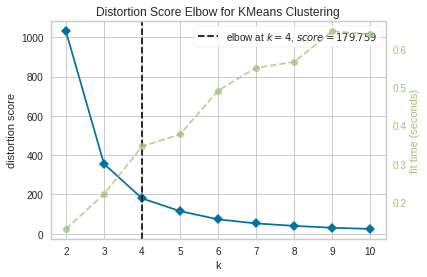

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
model = KElbowVisualizer(KMeans(), k=10)

model.fit(X_train)

model.show()


In [ ]:
print(kmeans.labels_[:500])
print(len(kmeans.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 3 3 3 3 1 1 3 3 0
 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 0 0 0 3 3 3 3 0 0 0 0 0 3
 3 1 1 1 1 1 1 1 1 3 3 3 3 1 1 3 3 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 3 3 3 1
 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 0
 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 1 1
 3 3 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 0 0
 0 0 3 3 3 3 1 1 1 1 3 3 3 1 1 1 1 3 3 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 3 3 3
 3 1 1 3 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 3 1 1 1 2 2 2 2 1 1 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0
 0 0 0 0 0 0 0 0 3 3 3 0 0 0 3 3 3 3 3 3 3 1 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1
 1 1 3 3 3 3 3 3 0 0 3 3 

In [ ]:
extract_groups()

Clipping cluster size from 4977 to 50
Cluster 0 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


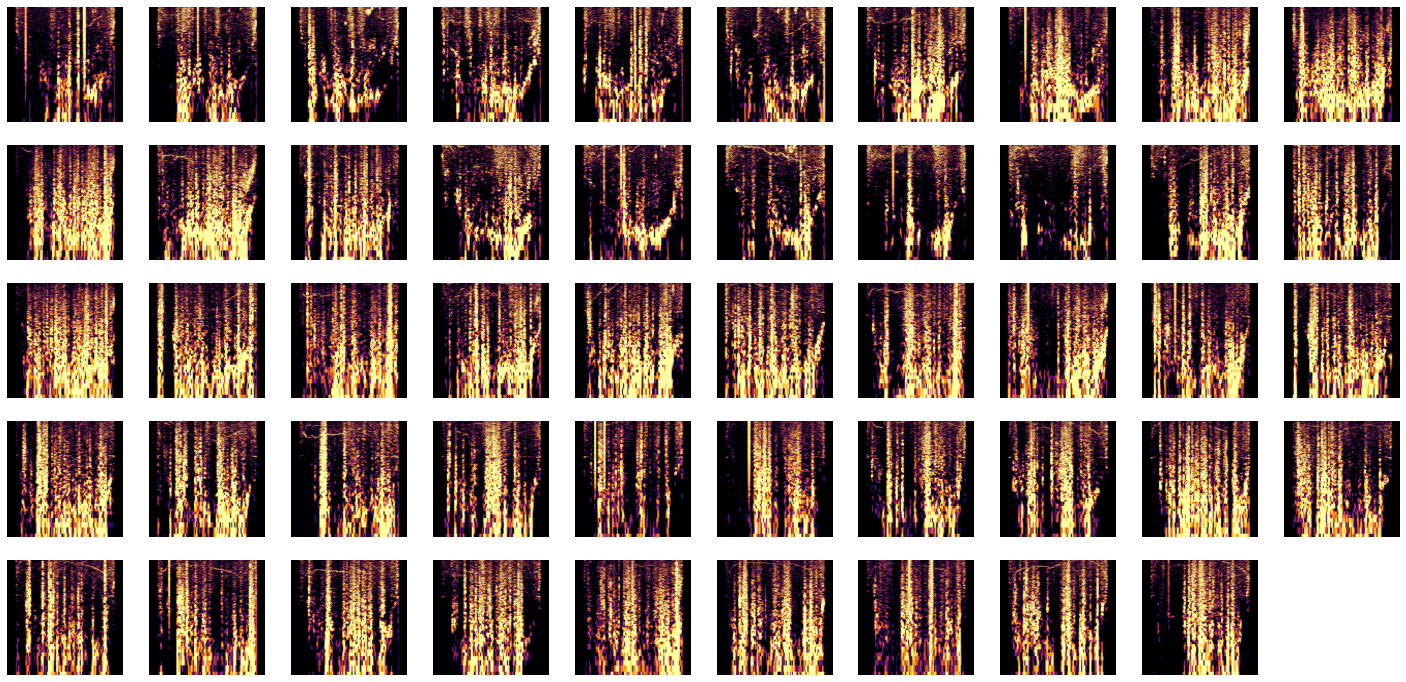

In [ ]:
view_cluster(0,50)

Clipping cluster size from 1590 to 50
Cluster 1 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


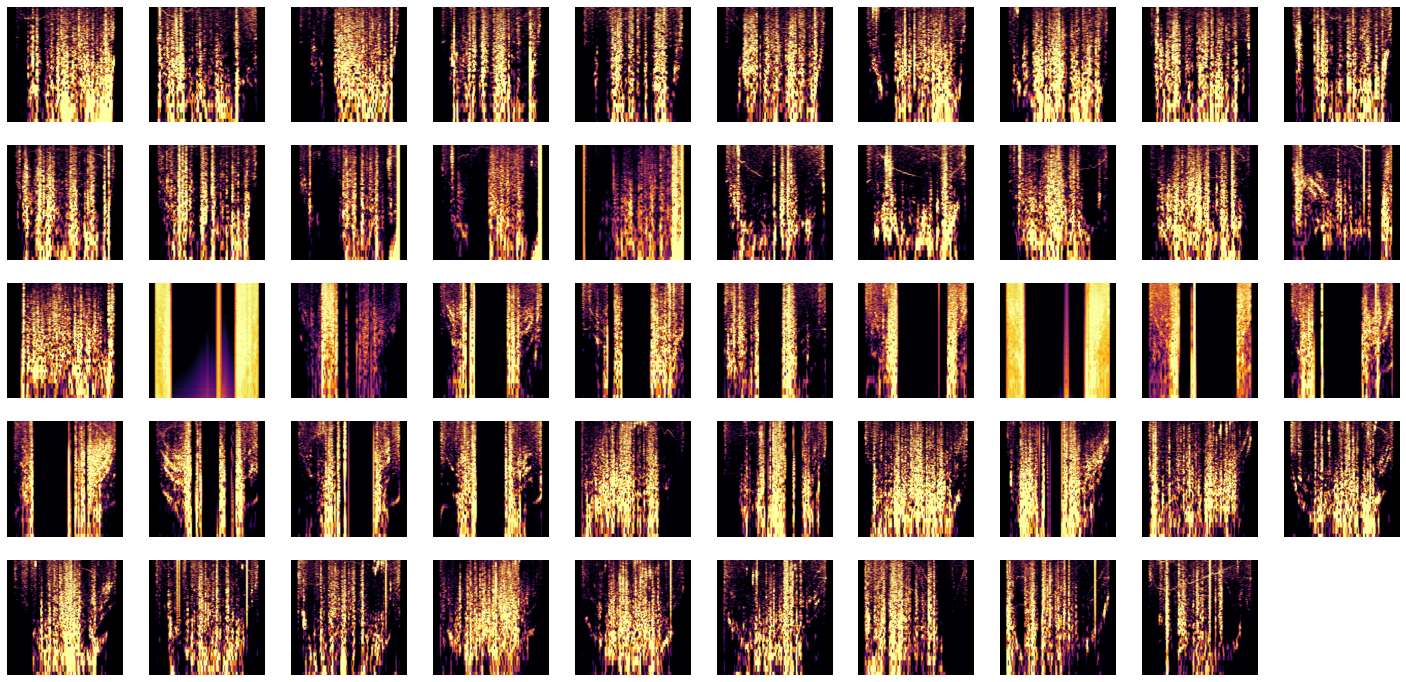

In [ ]:
view_cluster(1,50)

Clipping cluster size from 333 to 50
Cluster 2 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


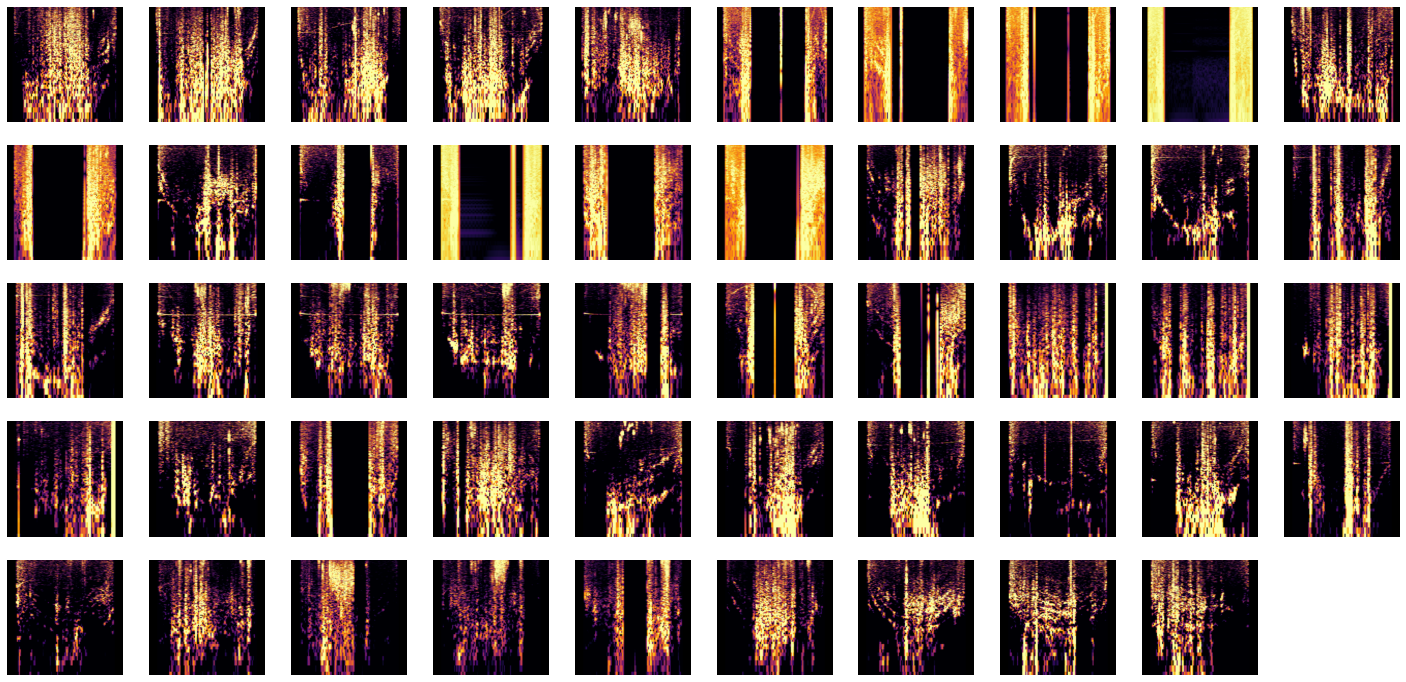

In [ ]:
view_cluster(2,50)

Clipping cluster size from 2907 to 50
Cluster 3 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


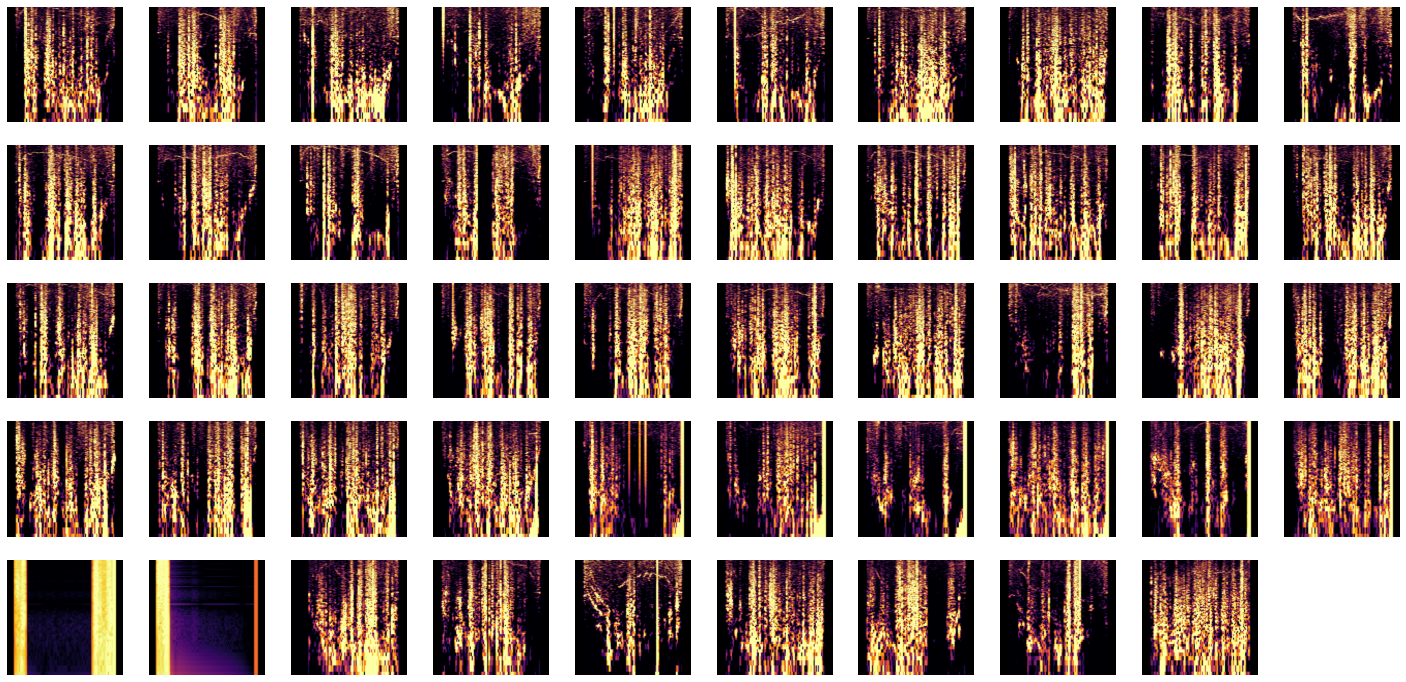

In [ ]:
view_cluster(3,50)